<a href="https://colab.research.google.com/github/batmanvane/complex-systems-modeling/blob/main/miniprojects/02Laser/laser_bifurcation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laser Rate Equation – Bifurcation Analysis**
This notebook analyzes the nondimensional laser rate equations:

$$ x' = x (y - 1), \qquad y' = -\alpha y - \alpha x y + \alpha \beta. $$

Parameters:
- $\alpha > 0$  (ratio of decay rates)
- $\beta$ (dimensionless pump parameter)

We will:
* nondimensionalize the system
* compute fixed points
* analyze stability
* generate phase portraits
* generate a stability diagram and bifurcation curves


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

## **Define the nondimensional laser system**

In [2]:
def laser_system(t, z, alpha, beta):
    x, y = z
    dx = x * (y - 1)
    dy = -alpha * y - alpha * x * y + alpha * beta
    return [dx, dy]

## **Fixed Points**
$$E_0 = (0, \beta)$$
$$E_L = (\beta - 1, 1), \quad (\beta > 1)$$

In [3]:
def fixed_points(alpha, beta):
    E0 = np.array([0, beta])
    EL = None
    if beta > 1:
        EL = np.array([beta - 1, 1])
    return E0, EL

fixed_points(1.0, 2.0)

(array([0., 2.]), array([1., 1.]))

## **Phase Portrait Plotter**

In [4]:
def phase_portrait(alpha, beta, title=None):
    x = np.linspace(0, max(4, beta+2), 30)
    y = np.linspace(0, max(4, beta+2), 30)
    X, Y = np.meshgrid(x, y)
    U = X * (Y - 1)
    V = -alpha * Y - alpha * X * Y + alpha * beta

    plt.figure(figsize=(8,6))
    plt.streamplot(X, Y, U, V, density=1.1, linewidth=0.7, arrowsize=1)

    E0, EL = fixed_points(alpha, beta)
    plt.scatter(E0[0], E0[1], s=80, color='blue', label='E0: trivial eq.')
    if EL is not None:
        plt.scatter(EL[0], EL[1], s=80, color='red', label='EL: lasing eq.')

    plt.xlabel('$x$ (scaled photons)')
    plt.ylabel('$y$ (scaled atoms)')
    plt.legend()
    plt.title(title or f'Phase Portrait (alpha={alpha}, beta={beta})')
    plt.show()

## **Example Phase Portraits**

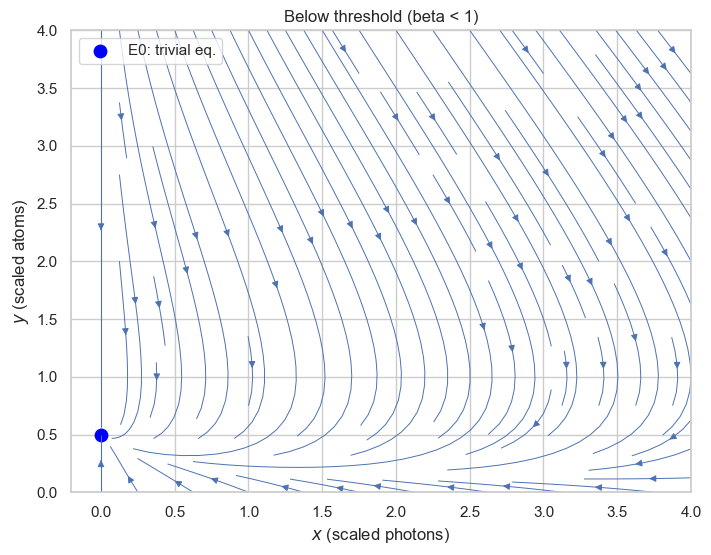

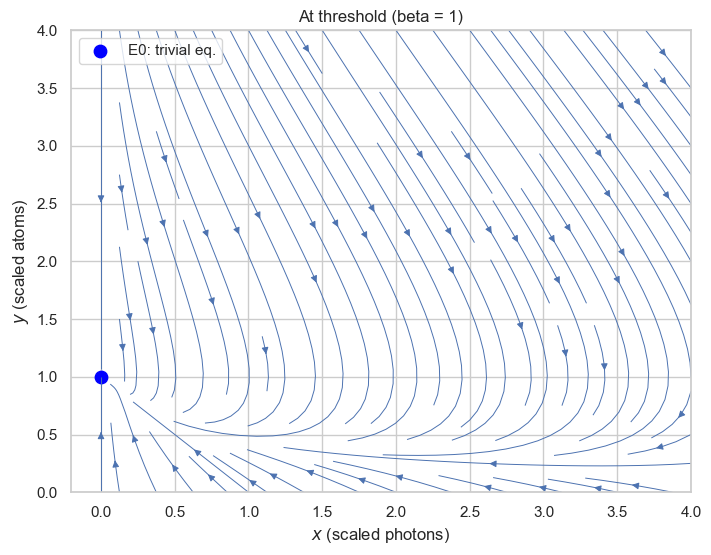

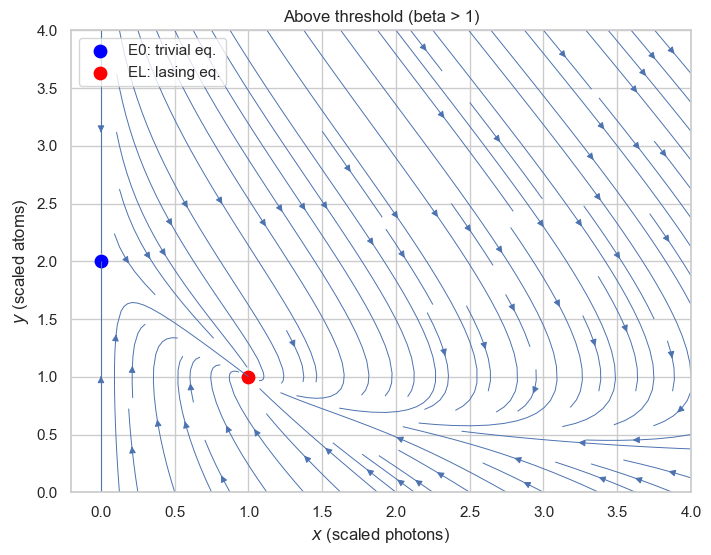

In [5]:
phase_portrait(alpha=1.0, beta=0.5, title='Below threshold (beta < 1)')
phase_portrait(alpha=1.0, beta=1.0, title='At threshold (beta = 1)')
phase_portrait(alpha=1.0, beta=2.0, title='Above threshold (beta > 1)')

## **Stability & Bifurcation Stability Curve**
The stability boundary between nodes and spirals is:

$$
\Delta = 0 \quad \Longleftrightarrow \quad
    \alpha = \frac{4(\beta - 1)}{\beta^2}.
$$

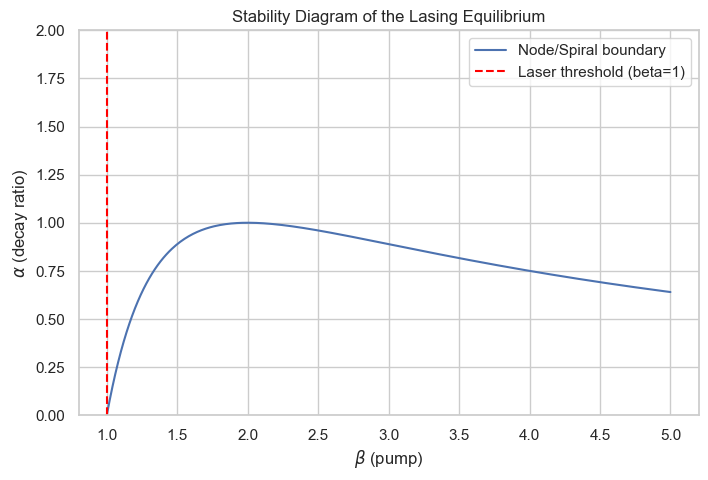

In [6]:
beta_vals = np.linspace(1.0, 5.0, 400)
alpha_curve = 4*(beta_vals - 1)/beta_vals**2

plt.figure(figsize=(8,5))
plt.plot(beta_vals, alpha_curve, label='Node/Spiral boundary')
plt.axvline(1, color='red', linestyle='--', label='Laser threshold (beta=1)')
plt.ylim(0, 2)
plt.xlabel('$\\beta$ (pump)')
plt.ylabel('$\\alpha$ (decay ratio)')
plt.title('Stability Diagram of the Lasing Equilibrium')
plt.legend()
plt.show()

## **Conclusion**
* For $\beta<1$: Only the trivial equilibrium exists and is stable.
* At $\beta=1$: A transcritical bifurcation.
* For $\beta>1$: The lasing equilibrium is stable (node or spiral).

This reproduces the standard laser threshold bifurcation described in Milonni & Eberly, Haken, and Strogatz.

## Chaotic Lorenz-like Laser Model

In the basic laser rate equations we studied,
we have only two dynamical variables (scaled photons \(x\) and scaled inversion \(y\)).
By the Poincaré–Bendixson theorem, such a 2D continuous-time system cannot be chaotic:
its long-term behavior is limited to equilibria and (at most) limit cycles.

Real lasers, however, can show chaotic intensity fluctuations when **additional
degrees of freedom** are important. A classical example is the
**Haken–Lorenz laser model**, where we add a third variable corresponding,
for example, to the medium polarization. After suitable nondimensionalization,
the equations can be written in the Lorenz form:

\[
\begin{aligned}
\dot X &= \sigma (Y - X),\\
\dot Y &= r X - Y - X Z,\\
\dot Z &= X Y - b Z.
\end{aligned}
\]

Here, roughly speaking,

- \(X\) corresponds to the electric field amplitude in the cavity,
- \(Y\) to the polarization of the medium,
- \(Z\) to the population inversion.

For certain parameter values (e.g.\ \(\sigma = 10\), \(r = 28\), \(b = 8/3\)),
this system exhibits the famous **Lorenz attractor** and strongly irregular
fluctuations of \(X(t)\) and hence of the laser intensity
\(\;I(t) \propto X(t)^2\).

Below, we simulate this Lorenz-like laser model and plot:

- the chaotic trajectory in \((X,Y,Z)\)-space,
- and the corresponding chaotic **intensity time series** \(I(t)\).


In [7]:
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting

In [8]:
def lorenz_laser_system(t, state, sigma, r, b):
    """
    Lorenz-like laser model (Haken-Lorenz form).

    state = [X, Y, Z]
    X ~ field amplitude
    Y ~ polarization
    Z ~ inversion
    """
    X, Y, Z = state
    dX = sigma * (Y - X)
    dY = r * X - Y - X * Z
    dZ = X * Y - b * Z
    return [dX, dY, dZ]


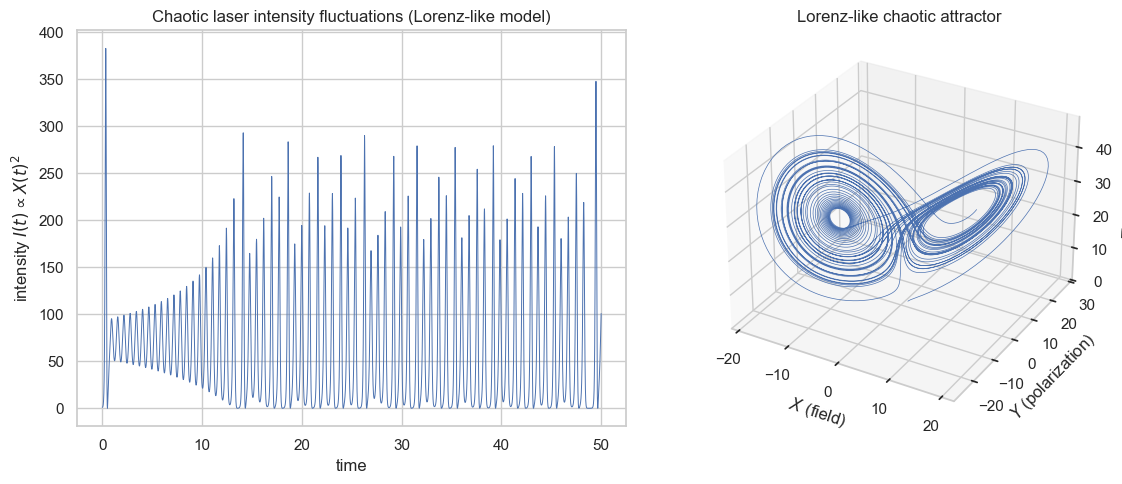

In [9]:
# Parameters in the classical chaotic regime
sigma = 10.0
r = 28.0
b = 8.0 / 3.0

# Time span and initial condition
t_span = (0.0, 50.0)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
state0 = [1.0, 1.0, 1.0]  # small nonzero initial condition

sol_lorenz = solve_ivp(
    lorenz_laser_system, t_span, state0,
    args=(sigma, r, b),
    t_eval=t_eval, atol=1e-9, rtol=1e-7
)

X = sol_lorenz.y[0]
Y = sol_lorenz.y[1]
Z = sol_lorenz.y[2]
t = sol_lorenz.t

# "Laser intensity" ~ field amplitude squared
I = X**2

fig = plt.figure(figsize=(12, 5))

# --- Left: intensity time series ---
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(t, I, linewidth=0.7)
ax1.set_xlabel("time")
ax1.set_ylabel("intensity $I(t) \\propto X(t)^2$")
ax1.set_title("Chaotic laser intensity fluctuations (Lorenz-like model)")

# --- Right: 3D Lorenz attractor ---
ax2 = fig.add_subplot(1, 2, 2, projection="3d")
ax2.plot(X, Y, Z, linewidth=0.5)
ax2.set_xlabel("$X$ (field)")
ax2.set_ylabel("$Y$ (polarization)")
ax2.set_zlabel("$Z$ (inversion)")
ax2.set_title("Lorenz-like chaotic attractor")

plt.tight_layout()
plt.show()


### Summary: From Simple Laser Threshold to Chaos

- Our original 2D laser rate equations cannot be chaotic (only fixed points / limit cycles).
- By adding a third variable (here, polarization / inversion coupling),
  the laser model can be cast into the Lorenz form.
- For suitable parameters, the field amplitude \(X(t)\) fluctuates chaotically,
  and the laser intensity \(I(t) \propto X(t)^2\) shows irregular spikes and dips.
- Physically, similar chaotic behavior can also arise from delayed feedback,
  external modulation, injection locking, or multimode dynamics.

This closes the loop from **nondimensionalization and fixed point analysis**
to **bifurcations and full-blown chaos** in laser systems.
